# Hands On Tutorial 1: Intro to Keras

### Imports and parameters

In [1]:
import keras
import keras.backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
batch_size = 128  # The number of examples to accumulate for a single gradient update in SGD.
num_classes = 10  # The number of classes equals the number of digits.
epochs = 50  # The number of epochs to train the model for.

### Dataset preparation

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


### Building Model Architecture

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Compile model and set loss function and metrics

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

### Model Training

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 233us/step - loss: 1.2495 - acc: 0.6757 - val_loss: 0.5447 - val_acc: 0.8735
Epoch 2/50
60000/60000 [==============================] - 10s 164us/step - loss: 0.5325 - acc: 0.8514 - val_loss: 0.3747 - val_acc: 0.8985
Epoch 3/50
60000/60000 [==============================] - 10s 160us/step - loss: 0.4287 - acc: 0.8760 - val_loss: 0.3219 - val_acc: 0.9107
Epoch 4/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.3760 - acc: 0.8914 - val_loss: 0.2931 - val_acc: 0.9181
Epoch 5/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.3420 - acc: 0.9016 - val_loss: 0.2704 - val_acc: 0.9228
Epoch 6/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.3187 - acc: 0.9084 - val_loss: 0.2539 - val_acc: 0.9266
Epoch 7/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.2993 - acc: 0.9130 - val_loss: 0.2406

### Model Evaluation

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

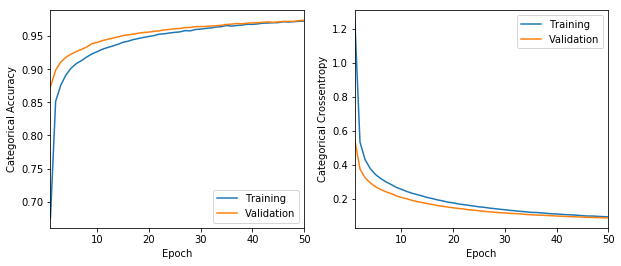

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(range(1, epochs+1), history.history['acc'], label='Training')
ax1.plot(range(1, epochs+1), history.history['val_acc'], label='Validation')
ax1.legend(loc='lower right')
ax1.set_xlim(1, epochs)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Categorical Accuracy')
ax2.plot(range(1, epochs+1), history.history['loss'], label='Training')
ax2.plot(range(1, epochs+1), history.history['val_loss'], label='Validation')
ax2.legend(loc='upper right')
ax2.set_xlim(1, epochs)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Categorical Crossentropy')
plt.show()

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Best validation loss: {0:.6f}'.format(score[0]))
print('Best validation accuracy: {0:.2f}%'.format(score[1]*100))

Best validation loss: 0.086920
Best validation accuracy: 97.38%


### Better model: Convolutional Neural Network

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [24]:
img_rows, img_cols = 28, 28
epochs = 20
    
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [25]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax'))

cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

In [27]:
cnn_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=SGD(),
              metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 166s 3ms/step - loss: 1.0164 - acc: 0.6791 - val_loss: 0.3115 - val_acc: 0.9099
Epoch 2/20
60000/60000 [==============================] - 192s 3ms/step - loss: 0.4386 - acc: 0.8657 - val_loss: 0.2315 - val_acc: 0.9339
Epoch 3/20
60000/60000 [==============================] - 183s 3ms/step - loss: 0.3616 - acc: 0.8911 - val_loss: 0.1967 - val_acc: 0.9406
Epoch 4/20
60000/60000 [==============================] - 181s 3ms/step - loss: 0.3245 - acc: 0.9020 - val_loss: 0.1784 - val_acc: 0.9484
Epoch 5/20
60000/60000 [==============================] - 170s 3ms/step - loss: 0.2971 - acc: 0.9116 - val_loss: 0.1617 - val_acc: 0.9525
Epoch 6/20
60000/60000 [==============================] - 173s 3ms/step - loss: 0.2773 - acc: 0.9155 - val_loss: 0.1488 - val_acc: 0.9574
Epoch 7/20
60000/60000 [==============================] - 148s 2ms/step - loss: 0.2569 - acc: 0.9228 - val_loss: 0.1387 - 

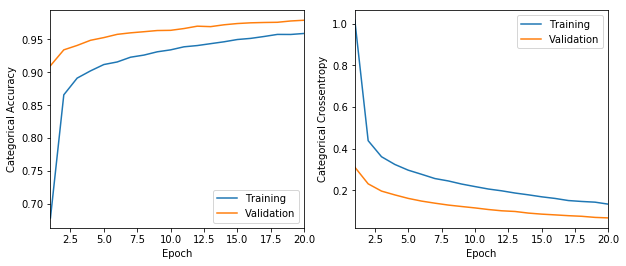

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(range(1, epochs+1), cnn_history.history['acc'], label='Training')
ax1.plot(range(1, epochs+1), cnn_history.history['val_acc'], label='Validation')
ax1.legend(loc='lower right')
ax1.set_xlim(1, epochs)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Categorical Accuracy')
ax2.plot(range(1, epochs+1), cnn_history.history['loss'], label='Training')
ax2.plot(range(1, epochs+1), cnn_history.history['val_loss'], label='Validation')
ax2.legend(loc='upper right')
ax2.set_xlim(1, epochs)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Categorical Crossentropy')
plt.show()

In [29]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Best validation loss: {0:.6f}'.format(score[0]))
print('Best validation accuracy: {0:.2f}%'.format(score[1]*100))

Best validation loss: 0.068038
Best validation accuracy: 97.88%
